## Neural network, experimentation tool, version 1

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# activation functions
# ReLu is very simple, it filters out all negative values
# this is a powerful activation function in reality
def activation_ReLu(number):
    if number > 0:
        return number
    else:
        return 0


# we also need a derivated version of ReLu
# otherwise same as original, but instead of original value, return 1 instead
def activation_ReLu_partial_derivative(number):
    if number > 0:
        return 1
    else:
        return 0

In [55]:
# lock down the randomness in order to get same results everytime
# you can change or disable this if you want
np.random.seed(123)

def generate_train_data():
    result = []

    # create 100 numbers
    for x in range(100):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)
        n3 = n1 ** 2 + n2 + np.random.randint(0, 5)
        n3 = int(n3)

        result.append([n1, n2, n3])


    return result


In [56]:
# initialize weights and biases
# in Keras/TensorFlow/PyTorch etc. these are usually randomized in the beginning
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# just for comparison after the training
original_w1 = 1
original_w2 = 0.5
original_w3 = 1
original_w4 = -0.5
original_w5 = 1
original_w6 = 1
original_b1 = 0.5
original_b2 = 0
original_b3 = 0.5

# our training data
# x1 = input1, x2 = input2, y = true_value
data = [
    [1, 0, 2],
    [2, 1, 6],
    [3, 3, 17]
]

# use generated training data from our helper function
data = generate_train_data()

# learning rate
LR = 0.001
epochs = 1000

# let's initalize a list for loss visualizations
loss_points = []

for epoch in range(epochs):
    for row in data:
        # this is where we do Forward pass + backpropagation
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        node_1_output

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)
        node_2_output

        # NODE 3 OUTPUT
        # we can just use Node 1 and 2 outputs, since they
        # already contain the previous weights in their result
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)
        node_3_output

        # LOSS FUNCTION - we are going to use MSE -> mean squared error
        # MSE formula for LOSS => (predicted_value - true_value) ^ 2
        predicted_value = node_3_output
        loss = (predicted_value - true_value) ** 2
        
        # BACKPROPAGATION - LAST LAYER FIRST
        # solving the partial derivative of the loss function with respect to w5
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # BACKPROPAGATION - THE FIRST LAYER
        # FROM THIS POINT ONWARD WE HAVE TO USE THE MORE COMPLEX VERSION
        # OF UPDATING THE VALUES => CHAIN RULE

        # weight 1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # ALL DONE! FINALLY UPDATE THE EXISTING WEIGHTS
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    loss_points.append(loss)
    print(f"Epoch: {epoch + 1}, loss: {loss}")
        

Epoch: 1, loss: 6.016411571791334
Epoch: 2, loss: 4.758289558557988
Epoch: 3, loss: 4.575386340181411
Epoch: 4, loss: 4.727909730016251
Epoch: 5, loss: 4.499508535144083
Epoch: 6, loss: 4.302577900619439
Epoch: 7, loss: 4.100827835458947
Epoch: 8, loss: 3.8971622629154234
Epoch: 9, loss: 3.6936674015208233
Epoch: 10, loss: 3.489421895319458
Epoch: 11, loss: 3.284161110795736
Epoch: 12, loss: 3.0782125242894
Epoch: 13, loss: 2.875852128778724
Epoch: 14, loss: 2.677437806867879
Epoch: 15, loss: 2.5772452674603326
Epoch: 16, loss: 2.4763479374882933
Epoch: 17, loss: 2.3761231923916553
Epoch: 18, loss: 2.277376561659176
Epoch: 19, loss: 2.1802044126348745
Epoch: 20, loss: 2.1073869127677303
Epoch: 21, loss: 2.044394652187758
Epoch: 22, loss: 2.058284456770161
Epoch: 23, loss: 2.0871752897900544
Epoch: 24, loss: 2.1074660946431156
Epoch: 25, loss: 2.1232277202053993
Epoch: 26, loss: 2.1362673041692424
Epoch: 27, loss: 2.148231309809732
Epoch: 28, loss: 2.1592964457713864
Epoch: 29, loss: 2.

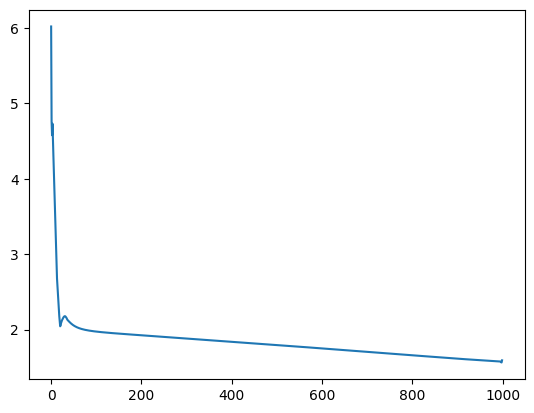

In [57]:
plt.plot(loss_points)
# plt.ylim(-1, 5)
plt.show()



In [58]:
print("ORIGINAL WEIGHTS AND BIASES")
print(f"w1: {original_w1}")
print(f"w2: {original_w2}")
print(f"w3: {original_w3}")
print(f"w4: {original_w4}")
print(f"w5: {original_w5}")
print(f"w6: {original_w6}")
print(f"b1: {original_b1}")
print(f"b2: {original_b2}")
print(f"b3: {original_b3}")

print("\n\n#################################\n\n")

print("NEW WEIGHTS AND BIASES")
print(f"w1: {new_w1}")
print(f"w2: {new_w2}")
print(f"w3: {new_w3}")
print(f"w4: {new_w4}")
print(f"w5: {new_w5}")
print(f"w6: {new_w6}")
print(f"b1: {new_b1}")
print(f"b2: {new_b2}")
print(f"b3: {new_b3}")



ORIGINAL WEIGHTS AND BIASES
w1: 1
w2: 0.5
w3: 1
w4: -0.5
w5: 1
w6: 1
b1: 0.5
b2: 0
b3: 0.5


#################################
NEW WEIGHTS AND BIASES
w1: 1.9745745043749072
w2: 1.5954037453790957
w3: 0.36455679957598336
w4: 0.28349079054111503
w5: 1.1393290934180376
w6: 0.91732926944733
b1: -1.1121701201811454
b2: -0.954870595006538
b3: 3.7281899463832677


In [59]:
# prediction function, just doing the forward pass
# again (but only that)
def predict(x1, x2):
    input1 = x1
    input2 = x2

    # NODE 1 OUTPUT
    node_1_output = input1 * w1 + input2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)

    # NODE 2 OUTPUT
    node_2_output = input1 * w2 + input2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    # NODE 3 OUTPUT
    # we can just use Node 1 and 2 outputs, since they
    # already contain the previous weights in their result
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)
    return node_3_output

   

In [63]:
# try using the model with our prediction function
result = predict(0, 3)
result

3.7281899463832677

In [61]:
# just to see what data we have, for reference
data

[[2, 3, 9],
 [1, 6, 9],
 [3, 4, 14],
 [0, 4, 5],
 [0, 5, 5],
 [1, 6, 11],
 [0, 3, 7],
 [1, 6, 10],
 [2, 3, 9],
 [4, 6, 22],
 [0, 6, 7],
 [3, 3, 16],
 [4, 5, 22],
 [3, 5, 15],
 [4, 3, 22],
 [2, 4, 8],
 [3, 5, 16],
 [2, 5, 11],
 [4, 6, 25],
 [3, 4, 17],
 [4, 5, 24],
 [2, 3, 11],
 [3, 5, 15],
 [3, 5, 15],
 [2, 3, 7],
 [1, 3, 6],
 [1, 4, 8],
 [4, 4, 21],
 [0, 3, 6],
 [1, 5, 9],
 [3, 6, 16],
 [1, 5, 9],
 [3, 6, 18],
 [0, 5, 6],
 [3, 4, 17],
 [3, 5, 15],
 [2, 6, 14],
 [3, 4, 13],
 [0, 4, 7],
 [0, 4, 5],
 [0, 6, 7],
 [3, 3, 16],
 [1, 3, 8],
 [3, 3, 15],
 [0, 5, 9],
 [4, 6, 26],
 [4, 6, 22],
 [0, 4, 4],
 [0, 3, 5],
 [2, 4, 8],
 [1, 5, 6],
 [2, 3, 11],
 [1, 5, 9],
 [1, 6, 11],
 [3, 4, 14],
 [0, 6, 7],
 [3, 4, 13],
 [1, 5, 8],
 [2, 5, 10],
 [3, 5, 17],
 [1, 4, 8],
 [3, 5, 18],
 [0, 6, 8],
 [3, 4, 15],
 [2, 6, 11],
 [3, 4, 16],
 [3, 6, 18],
 [0, 3, 7],
 [4, 4, 20],
 [0, 3, 4],
 [2, 4, 9],
 [4, 4, 23],
 [4, 5, 23],
 [4, 6, 22],
 [3, 6, 18],
 [2, 4, 9],
 [1, 4, 7],
 [2, 4, 10],
 [0, 4, 4],
 [1, 6, 